# *Drone Delivery: a Vehicle Routing Problem*

Authors: Adrian Menor, Federico Magri, Youssef Farah

// add description 

## Import Packages

In [16]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import random

## VRP Model

### Classes 

In [17]:
#DATASET 
#Here we create the dataset
#Initialize
class Drones():
    def __init__(self, name, maxspeed, maxpayload, number_of_drones):
        self.name = name
        self.maxspeed = maxspeed
        self.maxpayload = maxpayload
        self.number_of_drones = number_of_drones

class Clients():
    number_of_clients = 0
    def __init__(self, number, x_coord, y_coord, demand):
        self.number = number
        self.x_coord = x_coord
        self.y_coord = y_coord
        self.demand = demand
        Clients.number_of_clients += 1

### Sample Dataset

In [22]:
Clients.number_of_clients = 0
drones = Drones("Amazon Drone", 10, 5, 5)#(name, maxspeed, maxpayload, number_of_drones)

clients_list = []
for i in range(1,11):
    x_cord = random.sample(range(-100,100),1)[0]
    y_cord = random.sample(range(-100,100),1)[0]
    client = Clients(i, x_cord,y_cord, random.randint(1,5))
    clients_list.append(client)

T = 60 # [s] total delivery duration


In [23]:
print(len(clients_list))

10


## Model Setup

In [24]:
# Basic problem variables
n = Clients.number_of_clients # nodes
clients = [i for i in range(1,n+1)]
nodes = [0]+clients
N_N_0 = [(i,j) for i in nodes for j in clients if i!=j]
xc = [0]+[xc.x_coord for xc in clients_list] # customer x locations
yc = [0]+[yc.y_coord for yc in clients_list] #rnd.rand(n-1)*100 # customer y locations

In [25]:
print(n)

10


In [26]:
# Drone parameters
M = drones.number_of_drones # Number of drones
K = 100 # upper bound payload weight
v = drones.maxspeed # drone speed [m/s]
Q = drones.maxpayload# max drone payload [kg] 

In [27]:
# Decision variables
arcs = [(i,j) for i in nodes for j in nodes if i!=j] # fully connected links
sigma_var = [(i,j) for i in nodes[1:] for j in nodes[1:]] # going through depot
y = arcs # payload weight between paths
t = [i for i in nodes] # time at node i
a = [i for i in clients] # time between node i and depot

In [28]:
print(len(arcs))

110


In [29]:
# Costs
s = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in arcs} # euclidean distances
D = {i.number: i.demand for i in clients_list}# demand of client rnd.randint(1,5)

In [30]:
### Creating the Model ###
m = gp.Model('CVRP')

Restricted license - for non-production use only - expires 2023-10-25


In [32]:
# Adding decision variables
x = m.addVars(arcs,vtype = GRB.BINARY,name='x') # x = arcs 
sigma = m.addVars(sigma_var,vtype = GRB.BINARY,name='sigma') 
y = m.addVars(y,vtype = GRB.CONTINUOUS,name='y')
t = m.addVars(t,vtype = GRB.CONTINUOUS,name='t')
a = m.addVars(a,vtype = GRB.CONTINUOUS,name='a')

In [35]:
# Objective function
m.setObjective(gp.quicksum(s[i,j]*x[i,j] for i,j in arcs),GRB.MINIMIZE)

In [36]:
# Constraints
m.addConstrs(gp.quicksum(x[i,j] for j in nodes if j!= i) == 1 for i in clients) # (4a)
m.addConstrs(gp.quicksum(x[i,j] for j in nodes if j!= i)-gp.quicksum(x[j,i] for j in nodes if j!= i)== 0 for i in nodes ) #(4b)

#Reusability Constrains
m.addConstrs(gp.quicksum(sigma[i,j] for j in clients) <= x[i,0] for i in clients) # (5a)
m.addConstrs(gp.quicksum(sigma[j,i] for j in clients) <= x[0,i] for i in clients) # (5b)
m.addConstr(gp.quicksum(x[0,i] for i in clients) - gp.quicksum(sigma[i,j] for i,j in sigma_var if i!=j) <= M) # (5c)
#Demand Contrains
m.addConstrs(gp.quicksum(y[j,i] for j in nodes if j!=i) - gp.quicksum(y[i,j] for j in nodes if j!=i)==D[i] for i in clients) # (6a)
m.addConstrs(y[i,j] <= K*x[i,j] for i,j in arcs if i!=j) # (6b)
#Time Constrains
m.addConstrs(t[i] - t[j] + s[i,j]/v <= K* (1-x[i,j]) for i,j in N_N_0 if i!=j) # (7a)
m.addConstrs(t[i] - a[i] + s[i,0]/v <= K * (1 - x[i,0]) for i in clients) # (7b)
m.addConstrs(a[i] - t[j] + s[0,j]/v <= K * (1 - sigma[i,j]) for i,j in sigma_var if i!=j) # (7c)
m.addConstrs(t[i] <= T  for i in clients) # (7d)  and (7e) CHECK THIS CONSTRAINT
#
m.addConstrs(y[i,j] <= Q * x[i,j] for i,j in arcs if i!=j) #(8a)

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>

In [37]:
m.Params.timeLimit = 100 #[s]
m.optimize()

Set parameter TimeLimit to value 100
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 964 rows, 341 columns and 3780 nonzeros
Model fingerprint: 0x5eeb2343
Variable types: 131 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [9e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 719 rows and 122 columns
Presolve time: 0.03s
Presolved: 245 rows, 219 columns, 2088 nonzeros
Variable types: 73 continuous, 146 integer (146 binary)

Root relaxation: objective 1.139852e+03, 82 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1139.85217    0   12          - 1139.85217      -     -    0s
H    0     0                    1429

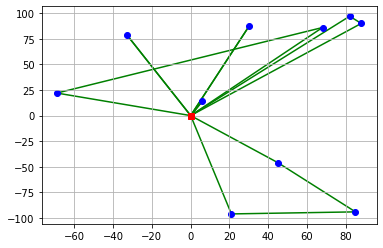

In [38]:
#Plotting
active_arcs = [a for a in arcs if x[a].x > 0.99]

for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')
plt.grid()
plt.show()